## GDP per Capita Prediction with Regression by Using Life Expectancy Dataset

Gross Domestic Product (GDP) per Capita is an economic indicator which is calculated by the division of country's economic output per person. Higher GDP per capita is often associated with positive outcomes in a wide range of areas such as better health, more education, and even greater life satisfaction [1], in other words the related economic indicator also represents the countries' welfare levels.

On the other hand, Lifetime Expectancy is another indicator to give insights about the welfare level of the countries. Life expectancy has increased rapidly since the Age of Enlightenment. In the early 19th century, life expectancy started to increase in the early industrialized countries while it stayed low in the rest of the world. This led to a very high inequality in how health was distributed across the world. Good health in the rich countries and persistently bad health in those countries that remained poor. [2]

In the case study, there are 2 different datasets used to build a model to predict GDP per Capita. The first one is Life Expectancy Dataset [3], which includes the countries' average lifetimes, including sexual breakdowns as female and male. Second one is, countries' GDP per Capita in terms of US Dollars [4]. Case study is starting with basic Exploratory Data Analysis (EDA) and then continued with Feature Engineering and Model Selection. 

Since the aim of the model is predicting GDP per Capita by using lifetime expectancy and geological locations of the countries, target variable is defined as GDP per Capita. After merging two datasets, it is realized that there are some missing values in the target variable (GDP per Capita). The missing values are imputed by K-Numbers of Neighbor (KNN) Imputer algorithm. 

Linear Regression, RandomForest Regression and Extreme Gradient Boosting Regression methods have been used in grid search to define the best algorithm, combined with different number of neighbors in KNN Imputer algorithm.
<br>
<br>
#### References:
<br>
[1] https://www.businesscouncilab.com/work/how-well-does-gdp-per-capita-really-measure-our-well-being/ <br>
[2] Max Roser, Esteban Ortiz-Ospina and Hannah Ritchie - "Life Expectancy" https://ourworldindata.org/life-expectancy <br>

##### Datasets: 
[3] Life Expectancy Dataset: https://www.kaggle.com/datasets/amansaxena/lifeexpectancy <br>
[4] GDP per Capita Dataset: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Life Expectancy Dataset: https://www.kaggle.com/datasets/amansaxena/lifeexpectancy
data = pd.read_csv('Life_expectancy_dataset.csv',encoding='latin-1')

In [3]:
data

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [5]:
data['Continent'].value_counts()

Africa           55
Europe           51
Asia             49
North America    34
Oceania          20
South America    14
Name: Continent, dtype: int64

In [6]:
Continent_group = data.groupby(by='Continent').mean().reset_index()

In [7]:
Continent_group.drop(columns=['Rank'],inplace=True)

In [8]:
Continent_group = Continent_group.sort_values(by='Overall Life', ascending=False)

<AxesSubplot:xlabel='Overall Life', ylabel='Continent'>

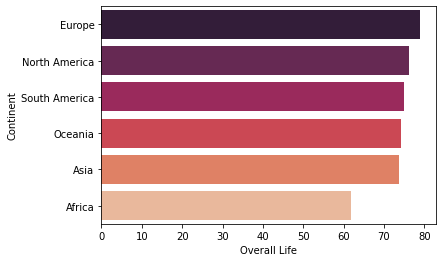

In [10]:
sns.barplot(data=Continent_group, x='Overall Life', y='Continent',palette='rocket')

#### Outcome: People live in Europe has the longest lifetime ever, compared to other continents.

In [11]:
df=data
df['Diff']=df['Female Life']-df['Male Life']

In [12]:
df.sort_values(by='Diff', ascending=False).head(15)

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Diff
155,156,Russia,70.3,64.3,76.4,Asia,12.1
137,138,Belarus,72.7,67.2,78.6,Europe,11.4
111,112,Lithuania,74.9,69.5,80.6,Europe,11.1
150,151,Kazakhstan,70.8,65.6,75.7,Asia,10.1
147,148,Ukraine,71.8,67.1,76.9,Europe,9.8
83,84,Estonia,76.7,71.9,81.7,Europe,9.8
120,121,Latvia,74.5,69.9,79.3,Europe,9.4
115,116,Seychelles,74.7,70.2,79.4,Africa,9.2
158,159,Mongolia,69.6,65.4,74.1,Asia,8.7
151,152,Kyrgyzstan,70.7,66.5,75.1,Asia,8.6


#### Outcome: Women lifetime is higher than men in Russia with 12.1 years, with the biggest difference.

In [13]:
df.groupby(by='Continent').mean().drop(columns=['Rank']).sort_values(by='Diff',ascending=False)

,Overall Life,Male Life,Female Life,Diff
Continent,,,,
Europe,79.019608,76.003922,82.237255,6.233333
South America,75.042857,72.157143,77.992857,5.835714
Oceania,74.230000,71.625000,76.915000,5.290000
Asia,73.618367,71.046939,76.138776,5.091837
North America,76.273529,73.914706,78.738235,4.823529
Africa,61.800000,60.109091,63.583636,3.474545


#### Outcome: Women live longer than men, but in Europe the difference in lifetimes seems to be much higher than in Africa.

In [199]:
print(f"World Average (Overall): {df['Overall Life'].mean():.2f}")
print(f"World Average (Male): {df['Male Life'].mean():.2f}")
print(f"World Average (Female): {df['Female Life'].mean():.2f}")

World Average (Overall): 72.45
World Average (Male): 70.01
World Average (Female): 74.98


## Importing GDP per Capita Dataset  <br>
In order to match Gross Domestic Product Dataset with Lifetime Dataset


In [14]:
# Gross Domestic Production per Capita Dataset: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
gdp = pd.read_csv('GDP_per_capita.csv',skiprows=3)

In [15]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

There are 266 different countries, however it cannot be observed a full covered GDP data in any year. <br>
e.g. in 2020, 242 countries' gdp data exist where there are 266 non-null country name. <br>
So, we can fill the countries gdp data with the previous years' data by "backfill algorithm".

In [16]:
gdp.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,153.494439,152.873313,162.413188,189.506170,168.816995,187.396306,...,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN,NaN
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5395.659532,5246.096346,NaN,NaN
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,NaN,NaN,NaN
7,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7373.201678,7300.030219,6220.716636,5969.616593,5987.341957,6504.148493,6489.043216,5612.686570,NaN,NaN
8,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,42412.639500,43751.805648,38663.400503,38141.867131,40644.791190,43839.324487,42701.443045,36284.555243,NaN,NaN
9,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1155.890717,850.304579,1173.238105,1279.113778,...,13080.254732,12334.798245,13789.060425,12790.242473,14613.041825,11795.159387,10056.637940,8579.017773,NaN,NaN


We have "Country Name" and "Country Code" columns, we can use one of those to match LifeExpectancy dataset. <br>
The Country Code seems more suitable, since the Country Names can differs like the full country names, or short names etc.

In [17]:
# Creating a new column, called 'Filled', with the latest GDP data which equals to year 2020.
gdp['Filled'] = gdp['2020']

In [18]:
gdp_new = gdp.mask(gdp.eq(-1)).ffill(axis=1)['Filled']

New dataset (gdp_new) has been created and filled with the latest value of each row.

In [19]:
gdp_new

0      30253.3
1      1359.62
2      516.748
3      1710.07
4      1776.17
        ...   
261    4310.81
262    758.145
263    5655.87
264    985.132
265    1214.51
Name: Filled, Length: 266, dtype: object

In [20]:
gdp_useful = gdp.loc[:,:'Country Code'].join(gdp_new)

In [21]:
gdp_useful

,Country Name,Country Code,Filled
0,Aruba,ABW,30253.3
1,Africa Eastern and Southern,AFE,1359.62
2,Afghanistan,AFG,516.748
3,Africa Western and Central,AFW,1710.07
4,Angola,AGO,1776.17
...,...,...,...
261,Kosovo,XKX,4310.81
262,"Yemen, Rep.",YEM,758.145
263,South Africa,ZAF,5655.87
264,Zambia,ZMB,985.132


A new dataframe (gdp_useful) has been created with the latest GDP values for each country. <br>
Now, gdp_useful dataset is ready to merge with Life Expectancy (df) dataset.

installing pycountry library in order to convert Lifetime Expectancy dataset's Country Name's to the same Country Codes
which is used in GDP dataset. <br>

pycountry library converts the Country Names to Country Codes, or vice versa.


In [22]:
#pip install pycountry
import pycountry

In [23]:
import country_converter as coco
converter = coco.CountryConverter()

In [24]:
df.Country

0             Monaco
1              Japan
2          Singapore
3       Macau; China
4         San Marino
           ...      
218            Gabon
219        Swaziland
220      Afghanistan
221    Guinea-Bissau
222             Chad
Name: Country, Length: 223, dtype: object

In [25]:
df['CountryCodes'] = converter.convert(names = df['Country'], src = 'name_short', to = 'ISO3')

Macau; China not found in name_short
Hong Kong, China not found in name_short
France, metropolitan not found in name_short
Saint Pierre and Miquelon not found in name_short
Faroe Islands not found in name_short
European Union not found in name_short
U.S. Virgin Islands not found in name_short
Wallis and Futuna not found in name_short
Saint Helena, Ascension and Tristan da Cunha not found in name_short
Northern Mariana Islands; US not found in name_short
Saint Lucia not found in name_short
Brunei not found in name_short
Republic of Macedonia not found in name_short
Saint Kitts and Nevis not found in name_short
People's Republic of China not found in name_short
Saint Vincent and the Grenadines not found in name_short
West Bank not found in name_short
Gaza Strip not found in name_short
Federated States of Micronesia not found in name_short
Greenland; Denmark not found in name_short
The Bahamas not found in name_short
Kyrgyzstan not found in name_short
Burma not found in name_short
São Tom

Some of the country names cannot be found by pycountry lib, because of different short names. 
<br>Let's try the official names.

In [26]:
df['CountryCodes_2'] = converter.convert(names = df['Country'], src = 'name_official', to = 'ISO3')

Monaco not found in name_official
Singapore not found in name_official
Macau; China not found in name_official
San Marino not found in name_official
Iceland not found in name_official
Hong Kong, China not found in name_official
Andorra not found in name_official
Switzerland not found in name_official
Israel not found in name_official
South Korea not found in name_official
Luxembourg not found in name_official
Australia not found in name_official
Italy not found in name_official
Sweden not found in name_official
Liechtenstein not found in name_official
France, metropolitan not found in name_official
Norway not found in name_official
Spain not found in name_official
Austria not found in name_official
Netherlands not found in name_official
Belgium not found in name_official
Finland not found in name_official
Germany not found in name_official
United Kingdom not found in name_official
Greece not found in name_official
Faroe Islands not found in name_official
Malta not found in name_officia

Still lots of country names cannot be converted.

In [27]:
df['CountryCodes_3'] = converter.convert(names = df['Country'], src = 'regex', to = 'ISO3')

More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau; China
More then one regular expression match for Macau

More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More the

More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark
More then one regular expression match for Greenland; Denmark


With "regex", only 3 names cannot be converted.
<br> 1- Macau,China
<br> 2- European Union
<br> 3- Greenland, Denmark
Cannot be found

 Try to find the details in Life Expectancy Dataset:

In [28]:
df.loc[(df['Country'] == 'Greenland; Denmark') | (df['Country'] == 'European Union')| (df['Country'] == 'Macau; China')]

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Diff,CountryCodes,CountryCodes_2,CountryCodes_3
3,4,Macau; China,84.5,81.6,87.6,Asia,6.0,not found,not found,"[CHN, MAC]"
38,39,European Union,80.2,77.4,83.2,Europe,5.8,not found,not found,not found
142,143,Greenland; Denmark,72.4,69.7,75.2,North America,5.5,not found,not found,"[DNK, GRL]"


#### "Macau; China" has two CountryCodes in CountryCodes_3. After a quick Google search, we can see that true should be MAC </n>

#### "European Union" is not a country, can be dropped from dataset </n>

#### "Greenland; Denmark" has two CountryCodes in CountryCodes_3, that should be GRL

Checking, if there are any other country codes that cannot be found by countryconverter lib.

In [29]:
df['ItemNumber'] = df['CountryCodes_3'].str.len()

In [30]:
df.loc[df['ItemNumber'] < 3]

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Diff,CountryCodes,CountryCodes_2,CountryCodes_3,ItemNumber
3,4,Macau; China,84.5,81.6,87.6,Asia,6.0,not found,not found,"[CHN, MAC]",2
142,143,Greenland; Denmark,72.4,69.7,75.2,North America,5.5,not found,not found,"[DNK, GRL]",2


I'll change the 3rd and 142nd rows' CountryCodes_3 columns as 'MAC' and 'GRL', respectively.

In [31]:
df['CountryCodes_3'][3] = 'MAC'

<ipython-input-31-2c2fe837731b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryCodes_3'][3] = 'MAC'


In [32]:
df['CountryCodes_3'][142] = 'GRL'

<ipython-input-32-f6b835ea9c20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryCodes_3'][142] = 'GRL'


In [33]:
# And try to understand, how many missing country codes that we have in each method.

In [34]:
(df['CountryCodes']=='not found').sum()

29

In [35]:
(df['CountryCodes_2']=='not found').sum()

173

In [36]:
(df['CountryCodes_3']=='not found').sum()

1

In [37]:
df.loc[df['CountryCodes_3'] == 'not found']

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Diff,CountryCodes,CountryCodes_2,CountryCodes_3,ItemNumber
38,39,European Union,80.2,77.4,83.2,Europe,5.8,not found,not found,not found,9


In [38]:
# European Union is not a country, so row 38 can be dropped from dataset

In [39]:
df.drop(index=38,inplace=True)

In [40]:
# Doublechecking, if there are still missing values

In [41]:
(df['CountryCodes_3']=='not found').sum()

0

In [42]:
# Rank, CountryCodes, CountryCodes_2 and ItemNumber columns will be dropped before modelling.

In [43]:
df.drop(columns=['Rank','CountryCodes','CountryCodes_2','ItemNumber'],inplace=True)

In [44]:
df

,Country,Overall Life,Male Life,Female Life,Continent,Diff,CountryCodes_3
0,Monaco,89.5,85.6,93.5,Europe,7.9,MCO
1,Japan,85.0,81.7,88.5,Asia,6.8,JPN
2,Singapore,85.0,82.3,87.8,Asia,5.5,SGP
3,Macau; China,84.5,81.6,87.6,Asia,6.0,MAC
4,San Marino,83.3,80.7,86.1,Europe,5.4,SMR
...,...,...,...,...,...,...,...
218,Gabon,52.1,51.6,52.5,Africa,0.9,GAB
219,Swaziland,51.6,52.2,51.0,Africa,-1.2,SWZ
220,Afghanistan,51.3,49.9,52.7,Asia,2.8,AFG
221,Guinea-Bissau,50.6,48.6,52.7,Africa,4.1,GNB


In [45]:
# let's rename the "CountryCodes_3" column.

In [46]:
df.rename(columns = {'CountryCodes_3':'Country Code'}, inplace = True)

In [47]:
df

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code
0,Monaco,89.5,85.6,93.5,Europe,7.9,MCO
1,Japan,85.0,81.7,88.5,Asia,6.8,JPN
2,Singapore,85.0,82.3,87.8,Asia,5.5,SGP
3,Macau; China,84.5,81.6,87.6,Asia,6.0,MAC
4,San Marino,83.3,80.7,86.1,Europe,5.4,SMR
...,...,...,...,...,...,...,...
218,Gabon,52.1,51.6,52.5,Africa,0.9,GAB
219,Swaziland,51.6,52.2,51.0,Africa,-1.2,SWZ
220,Afghanistan,51.3,49.9,52.7,Asia,2.8,AFG
221,Guinea-Bissau,50.6,48.6,52.7,Africa,4.1,GNB


In [48]:
# Now, the GDP dataset (gdp_useful) and Lifetime dataset (df) can be merged on "Country Code" column.

In [49]:
data = df.merge(gdp_useful,how='left',on='Country Code')

In [50]:
data

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code,Country Name,Filled
0,Monaco,89.5,85.6,93.5,Europe,7.9,MCO,Monaco,173688
1,Japan,85.0,81.7,88.5,Asia,6.8,JPN,Japan,40193.3
2,Singapore,85.0,82.3,87.8,Asia,5.5,SGP,Singapore,59797.8
3,Macau; China,84.5,81.6,87.6,Asia,6.0,MAC,"Macao SAR, China",39403.1
4,San Marino,83.3,80.7,86.1,Europe,5.4,SMR,San Marino,47731.2
...,...,...,...,...,...,...,...,...,...
217,Gabon,52.1,51.6,52.5,Africa,0.9,GAB,Gabon,6881.72
218,Swaziland,51.6,52.2,51.0,Africa,-1.2,SWZ,Eswatini,3424.28
219,Afghanistan,51.3,49.9,52.7,Asia,2.8,AFG,Afghanistan,516.748
220,Guinea-Bissau,50.6,48.6,52.7,Africa,4.1,GNB,Guinea-Bissau,727.52


In [51]:
# let's drop one of the country name column, and rename the Filled column by "GDP"

In [52]:
data.drop(columns=['Country Name'],inplace=True)

In [53]:
data.rename(columns={'Filled':'GDP'},inplace=True)

In [54]:
data

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code,GDP
0,Monaco,89.5,85.6,93.5,Europe,7.9,MCO,173688
1,Japan,85.0,81.7,88.5,Asia,6.8,JPN,40193.3
2,Singapore,85.0,82.3,87.8,Asia,5.5,SGP,59797.8
3,Macau; China,84.5,81.6,87.6,Asia,6.0,MAC,39403.1
4,San Marino,83.3,80.7,86.1,Europe,5.4,SMR,47731.2
...,...,...,...,...,...,...,...,...
217,Gabon,52.1,51.6,52.5,Africa,0.9,GAB,6881.72
218,Swaziland,51.6,52.2,51.0,Africa,-1.2,SWZ,3424.28
219,Afghanistan,51.3,49.9,52.7,Asia,2.8,AFG,516.748
220,Guinea-Bissau,50.6,48.6,52.7,Africa,4.1,GNB,727.52


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       222 non-null    object 
 1   Overall Life  222 non-null    float64
 2   Male Life     222 non-null    float64
 3   Female Life   222 non-null    float64
 4   Continent     222 non-null    object 
 5   Diff          222 non-null    float64
 6   Country Code  222 non-null    object 
 7   GDP           211 non-null    object 
dtypes: float64(4), object(4)
memory usage: 15.6+ KB


Countries in GDP data set was much more than Lifetime Expectancy dataset, but 11 country was not matched. <br>
Let's discover what are they?

In [56]:
data[pd.to_numeric(data['GDP'], errors='coerce').isnull()]

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code,GDP
9,Guernsey,82.5,79.9,85.4,Europe,5.5,GGY,NaN
17,Jersey,81.9,79.4,84.5,Europe,5.1,JEY,NaN
23,Anguilla,81.4,78.8,84.1,North America,5.3,AIA,NaN
35,Saint Pierre and Miquelon,80.5,78.2,83.0,North America,4.8,SPM,NaN
38,Taiwan,80.1,77.0,83.5,Asia,6.5,TWN,NaN
42,Wallis and Futuna,79.7,76.7,82.8,Oceania,6.1,WLF,NaN
43,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,6.0,SHN,NaN
45,Gibraltar,79.4,76.6,82.5,Europe,5.9,GIB,NY.GDP.PCAP.CD
53,British Virgin Islands,78.6,77.2,80.1,North America,2.9,VGB,NY.GDP.PCAP.CD
63,Falkland Islands,77.9,75.6,79.6,South America,4.0,FLK,NaN


Let's take a look at those locations, what was happened in GDP dataset. <br>
I'll take a look at some of NaN values (such as Guernsey, Jersey, ANguilla) and pre-filled with 'NY.GDP.PCAP.CD' rows (such as Gibraltar and British Virgin Islands).

In [57]:
gdp.loc[(gdp['Country Code'] == 'GGY') | (gdp['Country Code'] == 'JEY') | (gdp['Country Code'] == 'AIA')
       | (gdp['Country Code'] == 'GIB') | (gdp['Country Code'] == 'VGB')]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,Filled
84,Gibraltar,GIB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,British Virgin Islands,VGB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


According to query above, NaN values are not located inside the GDP dataset, <br>
on the other hand other countries  (whose GDP value equals to 'NY.GDP.PCAP.CD') are exists but there is no GDP value for those. <br>
We can impute the the missing values with KNN-Imputer algorithm.

In [58]:
data[pd.to_numeric(data['GDP'], errors='coerce').isnull()]

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code,GDP
9,Guernsey,82.5,79.9,85.4,Europe,5.5,GGY,NaN
17,Jersey,81.9,79.4,84.5,Europe,5.1,JEY,NaN
23,Anguilla,81.4,78.8,84.1,North America,5.3,AIA,NaN
35,Saint Pierre and Miquelon,80.5,78.2,83.0,North America,4.8,SPM,NaN
38,Taiwan,80.1,77.0,83.5,Asia,6.5,TWN,NaN
42,Wallis and Futuna,79.7,76.7,82.8,Oceania,6.1,WLF,NaN
43,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,6.0,SHN,NaN
45,Gibraltar,79.4,76.6,82.5,Europe,5.9,GIB,NY.GDP.PCAP.CD
53,British Virgin Islands,78.6,77.2,80.1,North America,2.9,VGB,NY.GDP.PCAP.CD
63,Falkland Islands,77.9,75.6,79.6,South America,4.0,FLK,NaN


In [59]:
data['GDP']=pd.to_numeric(data['GDP'], errors='coerce')

All the non-numeric values in GDP has been converted to "nan" values.

In [60]:
data[pd.to_numeric(data['GDP'], errors='coerce').isnull()]

,Country,Overall Life,Male Life,Female Life,Continent,Diff,Country Code,GDP
9,Guernsey,82.5,79.9,85.4,Europe,5.5,GGY,NaN
17,Jersey,81.9,79.4,84.5,Europe,5.1,JEY,NaN
23,Anguilla,81.4,78.8,84.1,North America,5.3,AIA,NaN
35,Saint Pierre and Miquelon,80.5,78.2,83.0,North America,4.8,SPM,NaN
38,Taiwan,80.1,77.0,83.5,Asia,6.5,TWN,NaN
42,Wallis and Futuna,79.7,76.7,82.8,Oceania,6.1,WLF,NaN
43,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,6.0,SHN,NaN
45,Gibraltar,79.4,76.6,82.5,Europe,5.9,GIB,NaN
53,British Virgin Islands,78.6,77.2,80.1,North America,2.9,VGB,NaN
63,Falkland Islands,77.9,75.6,79.6,South America,4.0,FLK,NaN


In [206]:
print(f" World Average (GDP): {data['GDP'].mean(): .2f} USD")

 World Average (GDP):  17207.42 USD


In [210]:
data.groupby(by='Continent').mean().drop(columns='Continent_Categorical').sort_values(by='GDP',ascending=False)

,Overall Life,Male Life,Female Life,Diff,GDP
Continent,,,,,
Europe,78.996000,75.976000,82.218000,6.242000,39224.208692
North America,76.273529,73.914706,78.738235,4.823529,22244.971493
Oceania,74.230000,71.625000,76.915000,5.290000,13093.505914
Asia,73.618367,71.046939,76.138776,5.091837,12508.647493
South America,75.042857,72.157143,77.992857,5.835714,9801.803116
Africa,61.800000,60.109091,63.583636,3.474545,2212.137341


### Feature Engineering

#### Data should be splitted to Train and Test before inormalized and imputed, in order to prevent data leakage.

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
DataFrame = data

In [63]:
DataFrame.columns

Index(['Country', 'Overall Life', 'Male Life', 'Female Life', 'Continent',
       'Diff', 'Country Code', 'GDP'],
      dtype='object')

Creating categorical variables for Continents

In [64]:
DataFrame['Continent_Categorical'] = DataFrame['Continent'].map({'Europe':0,'Asia':1,'Africa':2,'Oceania':3,'North America':4,
                                                'South America':5})

DataFrame['Continent_Categorical'] = DataFrame['Continent_Categorical'].astype('category')

DataFrame['Continent_Categorical']  = DataFrame['Continent_Categorical'].cat.codes.values

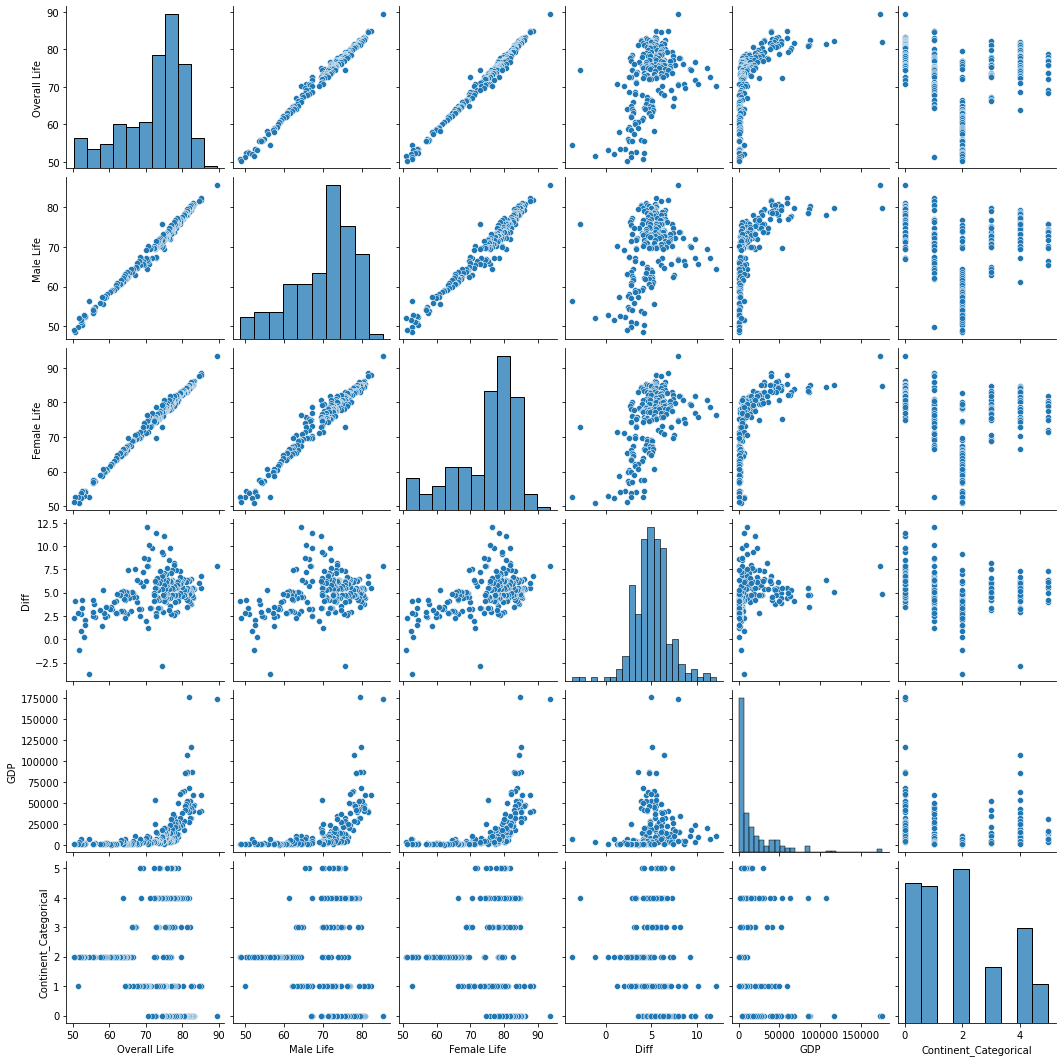

In [65]:
sns.pairplot(DataFrame)

<AxesSubplot:>

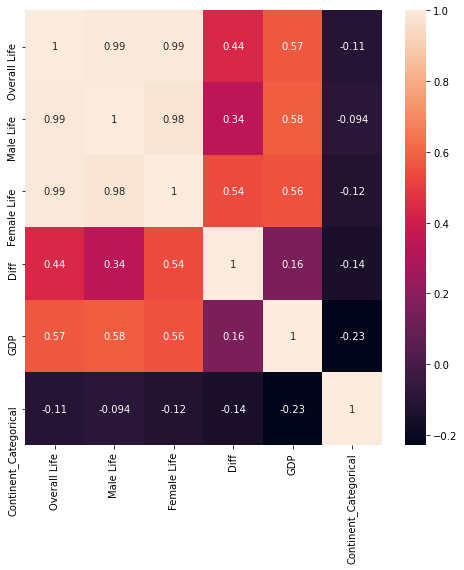

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(DataFrame.corr(), annot=True)

Since the Female Life vs Overall Life, Male Life vs. Overall Life, Female Life vs. Male Life have strong correlations, Female and Male Life columns should be dropped, only Diff column can be stay for representing the Difference between male and female life times.

In [67]:
DataFrame = DataFrame.drop(columns=['Female Life','Male Life'])

<AxesSubplot:>

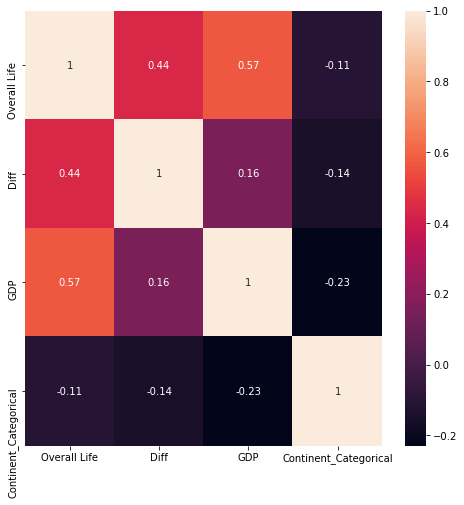

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(DataFrame.corr(), annot=True)

# Imputation of Missing Values

The missing value in GDP will be stored in DataFrame2 and to be added in training data set after train test split.
NaN values are dropped in DataFrame and stored as DataFrame_dropped. This dataset will be splitted in to train and test.

Since we have NaN values in our Target Variable (y), and I would like to use KNN Imputer algorithm, I need X and y variables together as a single dataset after splitted in to train and test.

In [69]:
DataFrame2 = DataFrame

In [70]:
DataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                222 non-null    object 
 1   Overall Life           222 non-null    float64
 2   Continent              222 non-null    object 
 3   Diff                   222 non-null    float64
 4   Country Code           222 non-null    object 
 5   GDP                    208 non-null    float64
 6   Continent_Categorical  222 non-null    int8   
dtypes: float64(3), int8(1), object(3)
memory usage: 12.4+ KB


In [71]:
DataFrame2[pd.to_numeric(DataFrame2['GDP'], errors='coerce').isnull()]

,Country,Overall Life,Continent,Diff,Country Code,GDP,Continent_Categorical
9,Guernsey,82.5,Europe,5.5,GGY,NaN,0
17,Jersey,81.9,Europe,5.1,JEY,NaN,0
23,Anguilla,81.4,North America,5.3,AIA,NaN,4
35,Saint Pierre and Miquelon,80.5,North America,4.8,SPM,NaN,4
38,Taiwan,80.1,Asia,6.5,TWN,NaN,1
42,Wallis and Futuna,79.7,Oceania,6.1,WLF,NaN,3
43,"Saint Helena, Ascension and Tristan da Cunha",79.5,Africa,6.0,SHN,NaN,2
45,Gibraltar,79.4,Europe,5.9,GIB,NaN,0
53,British Virgin Islands,78.6,North America,2.9,VGB,NaN,4
63,Falkland Islands,77.9,South America,4.0,FLK,NaN,5


In [73]:
DataFrame2_missings = DataFrame2[pd.to_numeric(DataFrame2['GDP'], errors='coerce').isnull()]

In [74]:
DataFrame2_missings

,Country,Overall Life,Continent,Diff,Country Code,GDP,Continent_Categorical
9,Guernsey,82.5,Europe,5.5,GGY,NaN,0
17,Jersey,81.9,Europe,5.1,JEY,NaN,0
23,Anguilla,81.4,North America,5.3,AIA,NaN,4
35,Saint Pierre and Miquelon,80.5,North America,4.8,SPM,NaN,4
38,Taiwan,80.1,Asia,6.5,TWN,NaN,1
42,Wallis and Futuna,79.7,Oceania,6.1,WLF,NaN,3
43,"Saint Helena, Ascension and Tristan da Cunha",79.5,Africa,6.0,SHN,NaN,2
45,Gibraltar,79.4,Europe,5.9,GIB,NaN,0
53,British Virgin Islands,78.6,North America,2.9,VGB,NaN,4
63,Falkland Islands,77.9,South America,4.0,FLK,NaN,5


In [76]:
DataFrame2_dropped = DataFrame2.dropna(subset=['GDP'])

Let's check if there is any NaN value in DataFrame_dropped dataset:

In [77]:
DataFrame2_dropped[pd.to_numeric(DataFrame2_dropped['GDP'], errors='coerce').isnull()]

,Country,Overall Life,Continent,Diff,Country Code,GDP,Continent_Categorical


In [78]:
DataFrame2_dropped

,Country,Overall Life,Continent,Diff,Country Code,GDP,Continent_Categorical
0,Monaco,89.5,Europe,7.9,MCO,173688.189360,0
1,Japan,85.0,Asia,6.8,JPN,40193.252445,1
2,Singapore,85.0,Asia,5.5,SGP,59797.752180,1
3,Macau; China,84.5,Asia,6.0,MAC,39403.135907,1
4,San Marino,83.3,Europe,5.4,SMR,47731.208540,0
...,...,...,...,...,...,...,...
217,Gabon,52.1,Africa,0.9,GAB,6881.715192,2
218,Swaziland,51.6,Africa,-1.2,SWZ,3424.282212,2
219,Afghanistan,51.3,Asia,2.8,AFG,516.747871,1
220,Guinea-Bissau,50.6,Africa,4.1,GNB,727.520172,2


In [79]:
y = DataFrame2_dropped['GDP']

In [80]:
DataFrame2_dropped.columns

Index(['Country', 'Overall Life', 'Continent', 'Diff', 'Country Code', 'GDP',
       'Continent_Categorical'],
      dtype='object')

X should include Overall Life, Diff and Continent_Categorical columns,<br>
 Country, Continent, Country Code, GDP must be dropped

In [81]:
X = DataFrame2_dropped.drop(columns=['Country','Continent','Country Code','GDP'])

In [82]:
y_missing = DataFrame2_missings['GDP']

In [83]:
X_missing = DataFrame2_missings.drop(columns=['Country','Continent','Country Code','GDP'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [85]:
y_train

97      8627.843157
100     7730.691746
208      567.669892
111     1334.370593
168     1467.604281
           ...     
161     1927.707823
149     9122.233430
169     2205.529016
16     43258.263872
110    20232.302036
Name: GDP, Length: 166, dtype: float64

In [86]:
y_missing

9     NaN
17    NaN
23    NaN
35    NaN
38    NaN
42    NaN
43    NaN
45    NaN
53    NaN
63    NaN
92    NaN
120   NaN
153   NaN
188   NaN
Name: GDP, dtype: float64

In [87]:
#GDP-value missing rows will be concatenated to the training dataset

In [88]:
X_train = pd.concat([X_train,X_missing])

In [89]:
X_train

,Overall Life,Diff,Continent_Categorical
97,75.6,7.0,2
100,75.5,5.9,0
208,55.5,2.5,2
111,74.9,4.9,1
168,66.6,5.0,1
...,...,...,...
63,77.9,4.0,5
92,75.8,5.8,3
120,74.4,-2.9,4
153,70.4,7.9,1


In [90]:
y_train = pd.concat([y_train,y_missing])

In [91]:
y_train

97     8627.843157
100    7730.691746
208     567.669892
111    1334.370593
168    1467.604281
          ...     
63             NaN
92             NaN
120            NaN
153            NaN
188            NaN
Name: GDP, Length: 180, dtype: float64

In [92]:
# Now we have 180 rows both in X_train and y_train. 
# Now, imputing algorithm will be defined for missing values in GDP.
# In order to perform Imputing we need to standardized the dataset, then perform the imputing, lastly we need to perform model
# selection. To cover all the steps, the best way is creating a pipeling.

In [93]:
#pip install xgboost

In [94]:
#Importing the necessary libraries:
# Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Standardization
from sklearn.preprocessing import MinMaxScaler

#Imputing
from sklearn.impute import KNNImputer

# Regression Models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [95]:
# Since we have missing values in GDP (target variable or y), in order to use KNN Imputer, we need to join 

In [96]:
imputation = X_train.join(y_train, how='left')

In [97]:
imputation

,Overall Life,Diff,Continent_Categorical,GDP
97,75.6,7.0,2,8627.843157
100,75.5,5.9,0,7730.691746
208,55.5,2.5,2,567.669892
111,74.9,4.9,1,1334.370593
168,66.6,5.0,1,1467.604281
...,...,...,...,...
63,77.9,4.0,5,NaN
92,75.8,5.8,3,NaN
120,74.4,-2.9,4,NaN
153,70.4,7.9,1,NaN


In [98]:
scaler = MinMaxScaler()
scaler.fit(imputation)
scaler.transform(imputation)

array([[6.42673522e-01, 6.77215190e-01, 4.00000000e-01, 4.66974142e-02],
       [6.40102828e-01, 6.07594937e-01, 0.00000000e+00, 4.15818149e-02],
       [1.25964010e-01, 3.92405063e-01, 4.00000000e-01, 7.37928832e-04],
       [6.24678663e-01, 5.44303797e-01, 2.00000000e-01, 5.10969213e-03],
       [4.11311054e-01, 5.50632911e-01, 2.00000000e-01, 5.86939686e-03],
       [3.23907455e-01, 5.56962025e-01, 4.00000000e-01, 1.70333197e-02],
       [2.44215938e-01, 4.36708861e-01, 4.00000000e-01, 2.05045806e-03],
       [5.86118252e-01, 5.69620253e-01, 2.00000000e-01, 1.33853781e-02],
       [5.86118252e-01, 4.43037975e-01, 6.00000000e-01, 1.38664321e-02],
       [6.45244216e-01, 5.44303797e-01, 8.00000000e-01, 1.02633956e-01],
       [6.73521851e-01, 4.05063291e-01, 4.00000000e-01, 1.63569089e-02],
       [4.01028278e-01, 5.56962025e-01, 6.00000000e-01, 6.92961273e-03],
       [6.81233933e-01, 7.02531646e-01, 0.00000000e+00, 1.07359611e-01],
       [5.16709512e-01, 7.34177215e-01, 0.00000000e

In [99]:
# Defining 2 different functions to complete the KNN Imputation with X and y variables together, 
# then split X and y in order to get ready for Grid Search

In [100]:
def preprocess_x(a):
    imputer_KNN_a = KNNImputer(n_neighbors=a, weights='uniform', metric='nan_euclidean')
    train_standardized_imputed_KNN_a = pd.DataFrame(imputer_KNN_a.fit_transform(imputation), columns=['Overall Life',
                                                                                     'Diff','Continent_Categorical','GDP'])
    X_train_a = train_standardized_imputed_KNN_a.drop(columns='GDP')
#    y_train_a = train_standardized_imputed_KNN_a['GDP']
#    X_train_a = pd.DataFrame(X_train_a)
#    y_train_a = pd.DataFrame(y_train_a)
    
    return(pd.DataFrame(X_train_a))

def preprocess_y(a):
    imputer_KNN_a = KNNImputer(n_neighbors=a, weights='uniform', metric='nan_euclidean')
    train_standardized_imputed_KNN_a = pd.DataFrame(imputer_KNN_a.fit_transform(imputation), columns=['Overall Life',
                                                                                     'Diff','Continent_Categorical','GDP'])
#    X_train_a = train_standardized_imputed_KNN_a.drop(columns='GDP')
    y_train_a = train_standardized_imputed_KNN_a['GDP']
#    X_train_a = pd.DataFrame(X_train_a)
#    y_train_a = pd.DataFrame(y_train_a)
    
    return(pd.DataFrame(y_train_a))
    


In [103]:
GridScores = {}

In [104]:
KNN_Imputer_neighbor = [5,6,7,8,9,10,11,12,13]
for i in KNN_Imputer_neighbor:
    pipe = Pipeline([('Model',LinearRegression())])

    search_space = [{'Model':[LinearRegression()]},
                
#                {'Imputer':[KNNImputer()],
#                'Imputer__n_neighbors':[5,10],
#                'Model':[HuberRegressor()]},
                
#                {'Imputer':[KNNImputer()],
#                'Imputer__n_neighbors':[5,10],
#                'Model':[TheilSenRegressor()]},

                   {'Model':[XGBRegressor()],
                   'Model__n_estimators':[300,1000,2500,5000],
                    'Model__max_depth':[10,50,100,500],
                   'Model__learning_rate':[0.01,0.001]},

                    {'Model':[RandomForestRegressor()],
                   'Model__n_estimators':[300,1000,2500,5000],
                    'Model__max_depth':[10,50,100,500]}]

    Regressor = GridSearchCV(estimator=pipe, param_grid=search_space, cv=KFold(n_splits=5, shuffle=True, random_state=3),
                  verbose=0, scoring=['neg_mean_absolute_error','r2'], n_jobs=-1,refit=False) 

    best_model = Regressor.fit(preprocess_x(i), preprocess_y(i))
    GridScores[i] = best_model.cv_results_

In [105]:
# In order to discrete which is the best Number of Neighbor for KNN Imputation
# we need a list to keep the Number of Neighbors, then we will convert it to pd.Series in order to 
# add it as a column to the consolidated score dataframe

In [165]:
Neigh = []

In [166]:
Scores_consolidated = pd.DataFrame()

In [169]:
for i in KNN_Imputer_neighbor:
    Scores_consolidated = Scores_consolidated.append(pd.DataFrame(GridScores[i]).drop(columns=['split0_test_neg_mean_absolute_error',
       'split1_test_neg_mean_absolute_error',
       'split2_test_neg_mean_absolute_error',
       'split3_test_neg_mean_absolute_error',
       'split4_test_neg_mean_absolute_error', 
        'split0_test_r2', 'split1_test_r2',
       'split2_test_r2', 'split3_test_r2', 'split4_test_r2']))
    Neigh += [i] * len(GridScores[i].get('mean_fit_time'))

In [170]:
Neigh = pd.Series(Neigh)

In [171]:
Scores_consolidated['KNN Neighbor'] = Neigh.values

In [172]:
Scores_consolidated.sort_values(by='mean_test_neg_mean_absolute_error',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__learning_rate,param_Model__max_depth,param_Model__n_estimators,params,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_r2,std_test_r2,rank_test_r2,KNN Neighbor
19,3.124811,0.137848,0.020069,7.462109e-03,"XGBRegressor(base_score=None, booster=None, ca...",0.001,10,2500,"{'Model': XGBRegressor(base_score=None, booste...",-9332.900050,2257.422105,1,0.517916,0.144228,25,6
31,3.846484,0.176716,0.023062,4.191355e-03,"XGBRegressor(base_score=None, booster=None, ca...",0.001,500,2500,"{'Model': XGBRegressor(base_score=None, booste...",-9350.366591,2283.729912,2,0.518009,0.146077,22,6
23,3.324329,0.117546,0.019720,9.292922e-03,"XGBRegressor(base_score=None, booster=None, ca...",0.001,50,2500,"{'Model': XGBRegressor(base_score=None, booste...",-9350.366591,2283.729912,2,0.518009,0.146077,22,6
27,3.473144,0.056724,0.024886,6.472143e-03,"XGBRegressor(base_score=None, booster=None, ca...",0.001,100,2500,"{'Model': XGBRegressor(base_score=None, booste...",-9350.366591,2283.729912,2,0.518009,0.146077,22,6
19,2.894211,0.024864,0.015625,2.861023e-07,"XGBRegressor(base_score=None, booster=None, ca...",0.001,10,2500,"{'Model': XGBRegressor(base_score=None, booste...",-9390.296070,1843.123699,1,0.495955,0.112022,20,8


In [ ]:
#Best Parameters:
# KNN Imputing with 6 neighbors
# XGBRegressor
# learning_rate: 0.001
# max_depth: 10
# n_estimators: 2500

In [ ]:
# Expected Mean Absolute Error in Test Data

In [173]:
Selected_Regressor = XGBRegressor(learning_rate=0.001,max_depth=10,n_estimators=2500)

In [175]:
X_train = preprocess_x(6)
y_train = preprocess_y(6)

In [180]:
Selected_Regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [181]:
y_preds = Selected_Regressor.predict(X_test)

In [182]:
df_comparison = pd.DataFrame(y_preds, columns=['Predicted'])

In [183]:
df_comparison = df_comparison.join(y_test.reset_index(), how='left')

In [184]:
df_comparison['Difference'] = df_comparison['Predicted'] - df_comparison['GDP']

In [185]:
df_comparison['Diff. Percentage'] = df_comparison['Difference']/df_comparison['GDP']*100

In [186]:
DataFrame.columns

Index(['Country', 'Overall Life', 'Continent', 'Diff', 'Country Code', 'GDP',
       'Continent_Categorical'],
      dtype='object')

In [187]:
DF = DataFrame.drop(columns=['Overall Life','Diff','Country Code','GDP','Continent_Categorical'])


In [188]:
DF['index'] = DF.index

In [189]:
DF

,Country,Continent,index
0,Monaco,Europe,0
1,Japan,Asia,1
2,Singapore,Asia,2
3,Macau; China,Asia,3
4,San Marino,Europe,4
...,...,...,...
217,Gabon,Africa,217
218,Swaziland,Africa,218
219,Afghanistan,Asia,219
220,Guinea-Bissau,Africa,220


In [190]:
df_comparison = df_comparison.merge(DF,)

In [191]:
df_comparison

,Predicted,index,GDP,Difference,Diff. Percentage,Country,Continent
0,4277.468262,145,3064.272388,1213.195873,39.591646,Cabo Verde,Africa
1,35345.062500,5,59264.034091,-23918.971591,-40.360013,Iceland,Europe
2,72831.703125,14,31769.965868,41061.737257,129.247030,Italy,Europe
3,20505.542969,55,22933.499591,-2427.956622,-10.586943,Czech Republic,Europe
4,7030.926758,72,15438.411666,-8407.484908,-54.458225,Uruguay,South America
5,34436.335938,22,48588.659385,-14152.323447,-29.126804,Austria,Europe
6,2579.674561,148,2389.012431,190.662130,7.980793,Honduras,North America
7,457.573914,213,875.353433,-417.779519,-47.726953,Lesotho,Africa
8,12525.864258,103,7278.016297,5247.847961,72.105471,Saint Vincent and the Grenadines,North America
9,2841.043213,166,2757.217530,83.825683,3.040227,Papua New Guinea,Oceania


In [192]:
print(f"MAE: {abs(df_comparison['Difference']).mean()}")
print(f"GDP Mean: {df_comparison['GDP'].mean()}")
print(f"% Diff: {abs(df_comparison['Difference']).mean()/df_comparison['GDP'].mean()}")

MAE: 6962.801516706261
GDP Mean: 14227.547295617162
% Diff: 0.4893887450896876
